# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%matplotlib notebook
%pylab
import csv
from scipy import stats
import numpy as np
import pandas as pd
import sklearn as sl
from sklearn import linear_model

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

# place your loading code here
dataset = np.array(list(lines)[1:], dtype=np.dtype(float))
print(dataset)

[[1.250000e+05 2.001000e+03 4.000000e+01 1.371110e+03]
 [1.500000e+05 2.001000e+03 4.000000e+01 1.298700e+03]
 [5.000000e+03 2.001000e+03 6.000000e+01 1.232430e+03]
 ...
 [2.000000e+04 2.015000e+03 2.600000e+02 4.949238e+04]
 [1.000000e+04 2.015000e+03 3.000000e+02 3.854269e+04]
 [2.000000e+04 2.015000e+03 3.000000e+02 3.968332e+04]]


Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




LinregressResult(slope=1509.0938253352238, intercept=-3018309.4849569635, rvalue=0.6767043169095446, pvalue=2.07223115991105e-174, stderr=45.625811824073196)


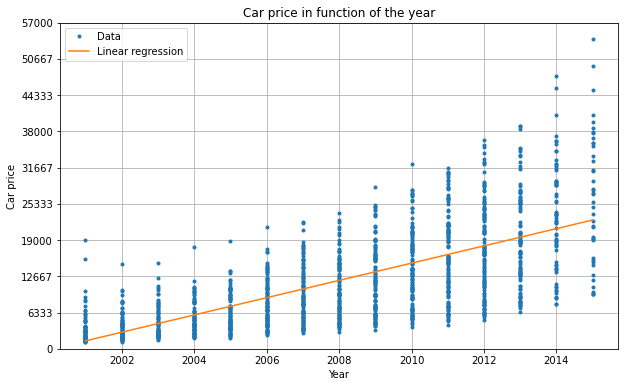

In [3]:
# linear regression with linregress (estimate price from year)

# your code.....
#km = dataset[:, 0]
#year = dataset[:, 1]
#power = dataset[:, 2]
#price = dataset[:, 3]

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.plot(year, price, 'o', markersize=3, label='Data')
#ax.set_ylim(0, 57000)
#ax.yaxis.set_major_locator(ticker.LinearLocator(10))
#ax.set_title('Car price in function of the year')
#ax.set_ylabel('Car price')
#ax.set_xlabel('Year')
#ax.grid()
#param = stats.linregress(year, price)
#print(param)
#ax.plot(year, param.intercept+(year*param.slope), label='Linear regression')
#ax.legend(loc='best')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dataset[:, 1], dataset[:, 3], 'o', markersize=3, label='Data')
ax.set_ylim(0, 57000)
ax.yaxis.set_major_locator(ticker.LinearLocator(10))
ax.set_title('Car price in function of the year')
ax.set_ylabel('Car price')
ax.set_xlabel('Year')
ax.grid()
param_1 = stats.linregress(dataset[:, 1], dataset[:, 3])
print(param_1)
ax.plot(dataset[:, 1], param_1.intercept+(dataset[:, 1]*param_1.slope), label='Linear regression')
ax.legend(loc='best')

In [4]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

# your code.....
X = dataset[:, 1].reshape(-1, 1)
#print(X)
y = dataset[:, 3].reshape(-1, 1)
#print(y)
regr = linear_model.LinearRegression()
regr.fit(X, y)
m_1 = regr.coef_[0, 0]
print(m_1)
q_1 = regr.intercept_[0]
print(q_1)

1509.09382533522
-3018309.4849569555


In [5]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !

# your code.....
m_year = np.mean(dataset[:, 1])
m_price = np.mean(dataset[:, 3])

num = 0.
den = 0.

for i in range(0, len(dataset[:, 1])):
    num += (dataset[i, 1]-m_year)*(dataset[i, 3]-m_price)
    den += (dataset[i, 1]-m_year)**2
    
m_1_ls = num/den
q_1_ls = m_price-(m_year*m_1_ls)
print(m_1_ls)
print(q_1_ls)

1509.0938253351871
-3018309.48495689


LinregressResult(slope=1509.0938253352238, intercept=-3018309.4849569635, rvalue=0.6767043169095446, pvalue=2.07223115991105e-174, stderr=45.625811824073196)


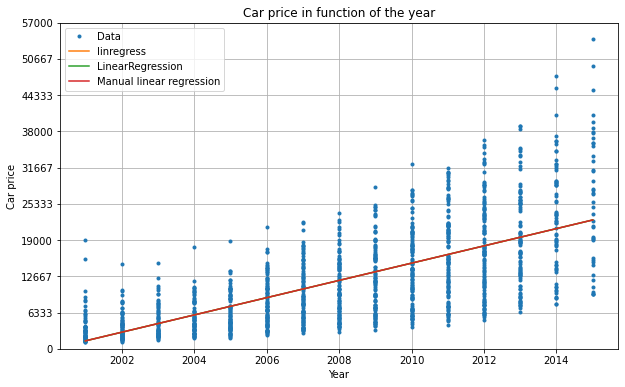

In [6]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

# your code....
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dataset[:, 1], dataset[:, 3], 'o', markersize=3, label='Data')
ax.set_ylim(0, 57000)
ax.yaxis.set_major_locator(ticker.LinearLocator(10))
ax.set_title('Car price in function of the year')
ax.set_ylabel('Car price')
ax.set_xlabel('Year')
ax.grid()
param_1 = stats.linregress(dataset[:, 1], dataset[:, 3])
print(param_1)
ax.plot(dataset[:, 1], param_1.intercept+(dataset[:, 1]*param_1.slope), label='linregress')
ax.plot(dataset[:, 1], q_1+(dataset[:, 1]*m_1), label='LinearRegression')
ax.plot(dataset[:, 1], q_1_ls+(dataset[:, 1]*m_1_ls), label='Manual linear regression')
ax.legend(loc='best')

LinregressResult(slope=90.33080718820231, intercept=-1303.912698987995, rvalue=0.7085500315263968, pvalue=2.670876398432412e-198, stderr=2.4999213289302586)


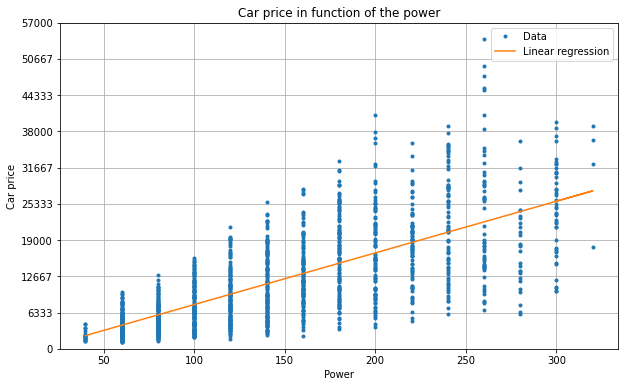

In [7]:
# linear regression with linregress (estimate price from power)

# your code.....
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dataset[:, 2], dataset[:, 3], 'o', markersize=3, label='Data')
ax.set_ylim(0, 57000)
ax.yaxis.set_major_locator(ticker.LinearLocator(10))
ax.set_title('Car price in function of the power')
ax.set_ylabel('Car price')
ax.set_xlabel('Power')
ax.grid()
param_2 = stats.linregress(dataset[:, 2], dataset[:, 3])
print(param_2)
ax.plot(dataset[:, 2], param_2.intercept+(dataset[:, 2]*param_2.slope), label='Linear regression')
ax.legend(loc='best')

LinregressResult(slope=-0.054251513309725635, intercept=16692.345302519738, rvalue=-0.25728674299884974, pvalue=4.6897144107235236e-21, stderr=0.0056622275650525895)


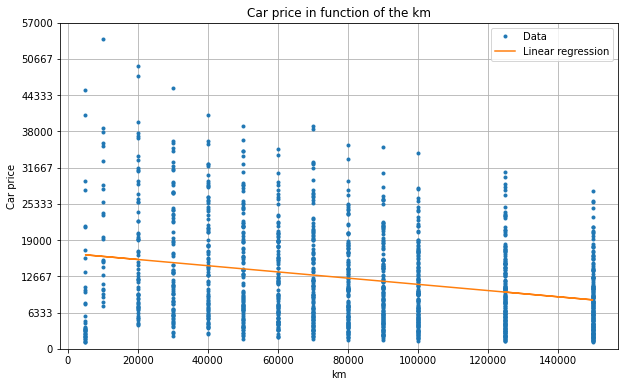

In [8]:
# linear regression with linregress (estimate price from km)

# your code...
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dataset[:, 0], dataset[:, 3], 'o', markersize=3, label='Data')
ax.set_ylim(0, 57000)
ax.yaxis.set_major_locator(ticker.LinearLocator(10))
ax.set_title('Car price in function of the km')
ax.set_ylabel('Car price')
ax.set_xlabel('km')
ax.grid()
param_0 = stats.linregress(dataset[:, 0], dataset[:, 3])
print(param_0)
ax.plot(dataset[:, 0], param_0.intercept+(dataset[:, 0]*param_0.slope), label='Linear regression')
ax.legend(loc='best')

In [9]:
# Have a look at the correlation coefficients to see which of the 3 features works better

# your code......
print(param_0.rvalue)
print(param_1.rvalue)
print(param_2.rvalue) #These features are the most correlated

-0.25728674299884974
0.6767043169095446
0.7085500315263968


[[1325.2284004    80.43004469]]
[-2661196.78674901]


<IPython.core.display.Javascript object>


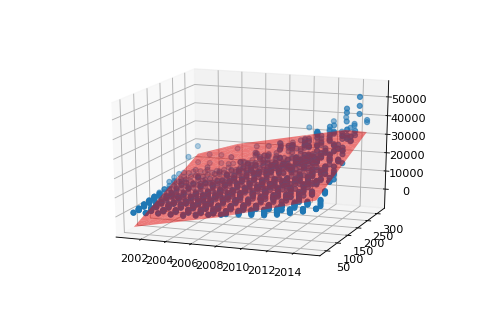

In [28]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)


# your code......
X1 = dataset[:, 2].reshape(-1, 1)
X_2d = np.column_stack((X, X1))
#print(X_2d)
regr_2d = linear_model.LinearRegression()
regr_2d.fit(X_2d, y)
m_1_2d = regr_2d.coef_
print(m_1_2d)
q_1_2d = regr_2d.intercept_
print(q_1_2d)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset[:, 1], dataset[:, 2], dataset[:, 3])
ax.plot_trisurf(dataset[:, 1], dataset[:, 2], (m_1_2d[0, 0]*dataset[:, 1])+(m_1_2d[0, 1]*dataset[:, 2])+q_1_2d, color='r', alpha=0.5)
plt.show()